In [10]:
import numpy as np
np.random.seed(101)

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import cluster
from scipy.spatial.distance import cdist
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_score

In [11]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [17]:
# print("X:\n",X[:15])
# print("\ny:\n",y)

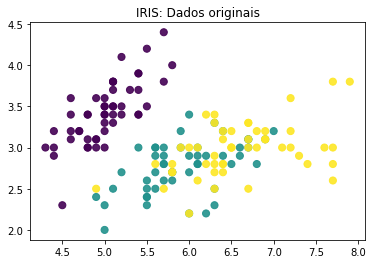

In [18]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.9)
plt.title('IRIS: Dados originais')
plt.show(True)

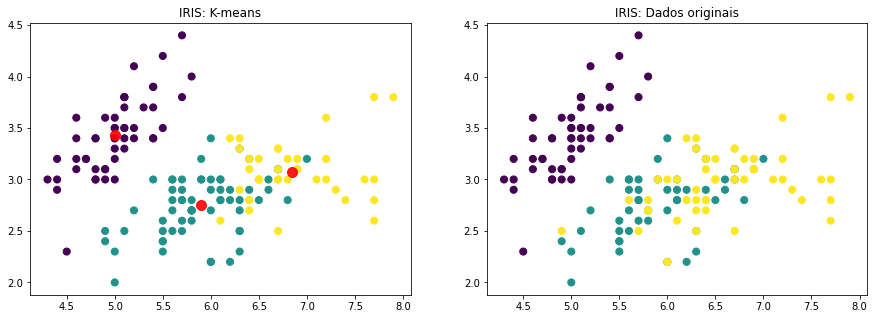


K-means:
Adjusted rand score: 0.7302382722834697
Mutual information score: 0.7581756800057784
Silhouette score: 0.5528190123564091


Agrupamento hierárquico - single linkage:
Adjusted rand score: 0.40223118045686995
Mutual information score: 0.5881714350212741
Silhouette score: 0.3304886352874641


In [28]:
k = 3 # numero de clusters a serem identificados
# define o método com k clusters
kmeans = KMeans(n_clusters=k) 

# realiza o ajuste considerando os dados X
kmeans.fit(X)

# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(X)

# define o tamanha da figura
plt.figure(figsize=(15,5))

# # mostra o primeiro gráfico
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.title('IRIS: K-means')
centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); 

# mostra o segundo gráfico
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50)
plt.title('IRIS: Dados originais')
plt.show(True)

print('\nK-means:')
print('Adjusted rand score:', adjusted_rand_score(y_km, y))
print('Mutual information score:', normalized_mutual_info_score(y_km, y, average_method='arithmetic'))
print('Silhouette score:', silhouette_score(X, y_km, metric='euclidean'))
print('\n')

print('Agrupamento hierárquico - single linkage:')
print('Adjusted rand score:', adjusted_rand_score(y_hr, y))
print('Mutual information score:', normalized_mutual_info_score(y_hr, y, average_method='arithmetic'))
print('Silhouette score:', silhouette_score(X, y_hr, metric='euclidean'))

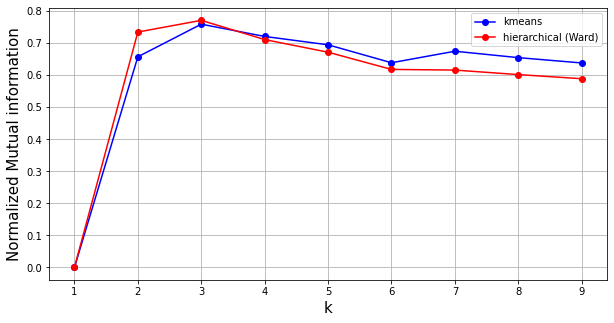

In [22]:
NMI_km = []
NMI_hr = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km.append(normalized_mutual_info_score(y_km, y, average_method='arithmetic'))
    clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
    y_hr = clustering.fit_predict(X)
    NMI_hr.append(normalized_mutual_info_score(y_hr, y, average_method='arithmetic'))
plt.figure(figsize=(10,5))
plt.plot(K, NMI_km, '-bo', label = 'kmeans')
plt.plot(K, NMI_hr, '-ro', label = 'hierarchical (Ward)')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

In [27]:
#